<a href="https://colab.research.google.com/github/kunikagupta27/Rainfall_Prediction_model/blob/main/Classification_Approach_%7C_Rainfall_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Rainfall Prediction Model </u></b>

***The Data is collected from the website https://open-meteo.com/.***

***Here I have collected the historical weather API data from date 1st Jan 2019 to 10th Feb 2023.***

***The attributes which I have selected are described below and with the help of these attributes I have created a rainfall prediction model by which we can predict the rainfall on daily basis.***

# **Attributes and their Description**

**Attribute Information:**

* **Time:-** Date given in format year-month-day

* **temperature_2m_max:-** Maximum daily air temperature at 2 meters above ground

* **temperature_2m_min:-** Minimum daily air temperature at 2 meters above ground

* **temperature_2m_mean (°C):-** Mean daily air temperature at 2 meters above ground

* **precipitation_sum (mm):-** Sum of daily precipitation (including rain, showers and snowfall)

* **rain_sum (mm):-** Sum of daily rain (Target Variable)

* **precipitation_hours (hours):-** The number of hours with rain

* **windspeed_10m_max (km/h (mph, m/s, knots):-** Maximum wind speed on a day

* **winddirection_10m_dominant (°):-** Dominant wind direction




# **Loading the dataset**

In [1]:
# Importing necessary libraries

import numpy as np
from numpy import math

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
pd.pandas.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Mounting the Google Drive to access data.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Loading the dataset

file_path = '/content/drive/MyDrive/Log9 Materials Assignment/Historical Weather API Data.csv'

df = pd.read_csv(file_path)

# **Dataset Inspection**

In this section I have done some basic operations to see what sort of data that we have and what all attributes are there along with the dependent variable.

In [4]:
# Checking the first 5 rows of the dataset

df.head()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°)
0,1/1/2019,26.2,10.0,18.2,0.0,0.0,0,10.1,131
1,1/2/2019,27.0,13.5,20.1,0.0,0.0,0,10.2,325
2,1/3/2019,26.0,12.2,18.7,0.0,0.0,0,10.5,40
3,1/4/2019,26.3,11.5,18.7,0.0,0.0,0,10.2,109
4,1/5/2019,27.5,13.0,19.6,0.0,0.0,0,12.5,189


In [5]:
# Checking the last 5 rows of the dataset

df.tail()

,time,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°)
1497,2/6/2023,28.9,16.2,21.8,0.0,0.0,0,10.2,222
1498,2/7/2023,28.3,14.3,21.1,0.0,0.0,0,11.6,346
1499,2/8/2023,28.7,13.4,21.0,0.0,0.0,0,9.7,57
1500,2/9/2023,30.0,14.9,22.6,0.0,0.0,0,9.6,189
1501,2/10/2023,32.0,14.6,22.9,0.0,0.0,0,16.8,262


In [6]:
# List of columns of the dataset 

df.columns

Index(['time', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)',
       'temperature_2m_mean (°C)', 'precipitation_sum (mm)', 'rain_sum (mm)',
       'precipitation_hours (h)', 'windspeed_10m_max (km/h)',
       'winddirection_10m_dominant (°)'],
      dtype='object')

In [7]:
# Checking number of rows and columns in our dataset.

df.shape

(1502, 9)

**Let's check the duplicate entries**

In [8]:
# Check for duplicated entries.
print("Duplicate entry in data:",len(df[df.duplicated()])) 

Duplicate entry in data: 0


In [9]:
# Custom Function for Dtype,Unique values and Null values
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

In [10]:
# Shape of the data.
print("Total Rows and Columns in DataFrame is :",df.shape,"\n")

# Custom Function
datainfo()

Total Rows and Columns in DataFrame is : (1502, 9) 



,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
time,object,1502,1502,0,0.0
temperature_2m_max (°C),float64,1502,224,0,0.0
temperature_2m_min (°C),float64,1502,218,0,0.0
temperature_2m_mean (°C),float64,1502,220,0,0.0
precipitation_sum (mm),float64,1502,190,0,0.0
rain_sum (mm),float64,1502,190,0,0.0
precipitation_hours (h),int64,1502,25,0,0.0
windspeed_10m_max (km/h),float64,1502,221,0,0.0
winddirection_10m_dominant (°),int64,1502,347,0,0.0


*  **Our dataset has no null and duplicate values**
*  **Our dataset has a total of 1502 rows and 9 independent features**
*  **Our response variable is the 'rain_sum (mm)' column**

# **Preprocessing the Data**

Data Preprocessing is a technique that is used to convert the raw data into a clean data set. In other words, whenever the data is gathered from different sources it is collected in raw format which is not feasible for the analysis.

For achieving better results from the applied model in Machine Learning projects the format of the data has to be in a proper manner.

**Renaming the time column as date bacause the information in the column is dates.**

In [11]:
# Renaming the column from time to date

df.rename(columns={"time":"Date"},inplace = True)

In [12]:
# Converting the Date column in Datetime Dtype as it is in object Dtype
df['Date'] = pd.to_datetime(df['Date'])

# Checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502 entries, 0 to 1501
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            1502 non-null   datetime64[ns]
 1   temperature_2m_max (°C)         1502 non-null   float64       
 2   temperature_2m_min (°C)         1502 non-null   float64       
 3   temperature_2m_mean (°C)        1502 non-null   float64       
 4   precipitation_sum (mm)          1502 non-null   float64       
 5   rain_sum (mm)                   1502 non-null   float64       
 6   precipitation_hours (h)         1502 non-null   int64         
 7   windspeed_10m_max (km/h)        1502 non-null   float64       
 8   winddirection_10m_dominant (°)  1502 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(2)
memory usage: 105.7 KB


In [13]:
# Seperating Day, Month, Year from DataFrame Column.

df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [14]:
# dropping the Date column after extracting necessory information.

df.drop(columns=['Date'],inplace=True)

In [15]:
# Checking the head of our dataset
df.head()

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),Day,Month,Year
0,26.2,10.0,18.2,0.0,0.0,0,10.1,131,1,1,2019
1,27.0,13.5,20.1,0.0,0.0,0,10.2,325,2,1,2019
2,26.0,12.2,18.7,0.0,0.0,0,10.5,40,3,1,2019
3,26.3,11.5,18.7,0.0,0.0,0,10.2,109,4,1,2019
4,27.5,13.0,19.6,0.0,0.0,0,12.5,189,5,1,2019


**Checking the Unique Values in our target variable "rain_sum (mm)"**

In [16]:
# Checking all the unique values present in our target variable
df['rain_sum (mm)'].unique()

array([0.000e+00, 3.000e-01, 7.000e-01, 2.100e+00, 2.000e-01, 9.000e-01,
       8.000e-01, 5.800e+00, 1.000e-01, 5.100e+00, 1.300e+00, 2.000e+00,
       2.600e+00, 5.000e-01, 3.800e+00, 4.400e+00, 6.900e+00, 7.300e+00,
       1.600e+00, 1.220e+01, 1.400e+01, 5.700e+00, 4.800e+00, 3.240e+01,
       4.700e+01, 1.700e+01, 3.080e+01, 1.020e+01, 1.330e+01, 1.400e+00,
       1.000e+00, 6.000e-01, 1.100e+00, 4.000e-01, 2.310e+01, 6.000e+00,
       2.200e+00, 6.400e+00, 1.360e+01, 2.280e+01, 2.390e+01, 7.000e+00,
       8.700e+00, 5.500e+00, 9.000e+00, 8.000e+00, 1.990e+01, 7.700e+00,
       2.030e+01, 8.300e+00, 4.720e+01, 6.180e+01, 6.320e+01, 4.900e+00,
       2.330e+01, 2.800e+01, 1.100e+01, 3.330e+01, 4.890e+01, 1.040e+01,
       9.500e+00, 9.800e+00, 1.160e+01, 1.620e+01, 1.590e+01, 2.380e+01,
       7.200e+00, 1.540e+01, 2.880e+01, 5.030e+01, 1.180e+01, 2.550e+01,
       9.680e+01, 9.020e+01, 1.700e+00, 1.830e+01, 9.400e+00, 1.430e+01,
       1.270e+01, 1.280e+01, 1.210e+01, 1.200e+01, 

**Here I have assumed that if the rain sum value is greater then 1 then there is rainfall and if the rain sum value is less then 1 then we assumed that there is no rainfall.**

**So here I have used lambda function to map the values as "Yes" and "No".**

In [17]:
# Mapping the values greater ten 1 as "Yes" and less then 1 as "No"

df['Rain'] = df['rain_sum (mm)'].apply(lambda x: "Yes" if x > 1 else "No")

**We have two types of variables in our data set. These are Numerical Variables and Categorical Variables.**



**Numerical Data**

In [18]:
# list of numerical variables
numerical_features=[col for col in df.columns if df[col].dtype!='O']\

# Separate dataframe for Numerical feature
num_data = df[numerical_features]
num_data.head()

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),Day,Month,Year
0,26.2,10.0,18.2,0.0,0.0,0,10.1,131,1,1,2019
1,27.0,13.5,20.1,0.0,0.0,0,10.2,325,2,1,2019
2,26.0,12.2,18.7,0.0,0.0,0,10.5,40,3,1,2019
3,26.3,11.5,18.7,0.0,0.0,0,10.2,109,4,1,2019
4,27.5,13.0,19.6,0.0,0.0,0,12.5,189,5,1,2019


In [19]:
# Statistical info.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m_max (°C),1502.0,30.249068,5.201051,17.5,26.7,29.1,33.2,43.3
temperature_2m_min (°C),1502.0,20.100999,5.089638,7.0,15.9,21.8,23.9,30.5
temperature_2m_mean (°C),1502.0,24.940679,4.838645,13.4,21.7,24.6,27.9,35.7
precipitation_sum (mm),1502.0,3.054394,11.621508,0.0,0.0,0.0,1.2,266.7
rain_sum (mm),1502.0,3.054394,11.621508,0.0,0.0,0.0,1.2,266.7
precipitation_hours (h),1502.0,3.581225,6.245990,0.0,0.0,0.0,5.0,24.0
windspeed_10m_max (km/h),1502.0,14.855992,4.859161,5.2,11.2,14.2,17.9,34.2
winddirection_10m_dominant (°),1502.0,184.996671,104.482185,0.0,82.0,190.0,280.0,360.0
Day,1502.0,15.667111,8.819289,1.0,8.0,16.0,23.0,31.0
Month,1502.0,6.378828,3.510282,1.0,3.0,6.0,9.0,12.0


**Categorical Data**

In [20]:
# list of categorical variables
categorical_features = [col for col in df.columns if df[col].dtype=='O']

# Separate dataframe for Categorical feature
cat_data = df[categorical_features]
cat_data.head()

,Rain
0,No
1,No
2,No
3,No
4,No


In [21]:
# Checking the head of the dataset
df.head(5)

,temperature_2m_max (°C),temperature_2m_min (°C),temperature_2m_mean (°C),precipitation_sum (mm),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),Day,Month,Year,Rain
0,26.2,10.0,18.2,0.0,0.0,0,10.1,131,1,1,2019,No
1,27.0,13.5,20.1,0.0,0.0,0,10.2,325,2,1,2019,No
2,26.0,12.2,18.7,0.0,0.0,0,10.5,40,3,1,2019,No
3,26.3,11.5,18.7,0.0,0.0,0,10.2,109,4,1,2019,No
4,27.5,13.0,19.6,0.0,0.0,0,12.5,189,5,1,2019,No


# **Exploratory Data Analysis**

Exploratory Data Analysis (EDA) is an approach to analyzing and summarizing data sets in order to extract insights and understand the data better. It involves using a variety of techniques and visualizations to get a sense of the structure, patterns, and relationships within the data.

In EDA, the focus is on discovering and understanding the characteristics of the data rather than testing specific hypotheses or making predictions. EDA can be useful in a wide range of applications, from scientific research to business analysis.

# **Univariate Analysis of Numerical Features**

Univariate analysis is a type of data analysis that involves examining a single variable or feature in isolation, without considering any other variables. The objective of univariate analysis is to describe and summarize the distribution, central tendency, and variability of a single variable in a data set.

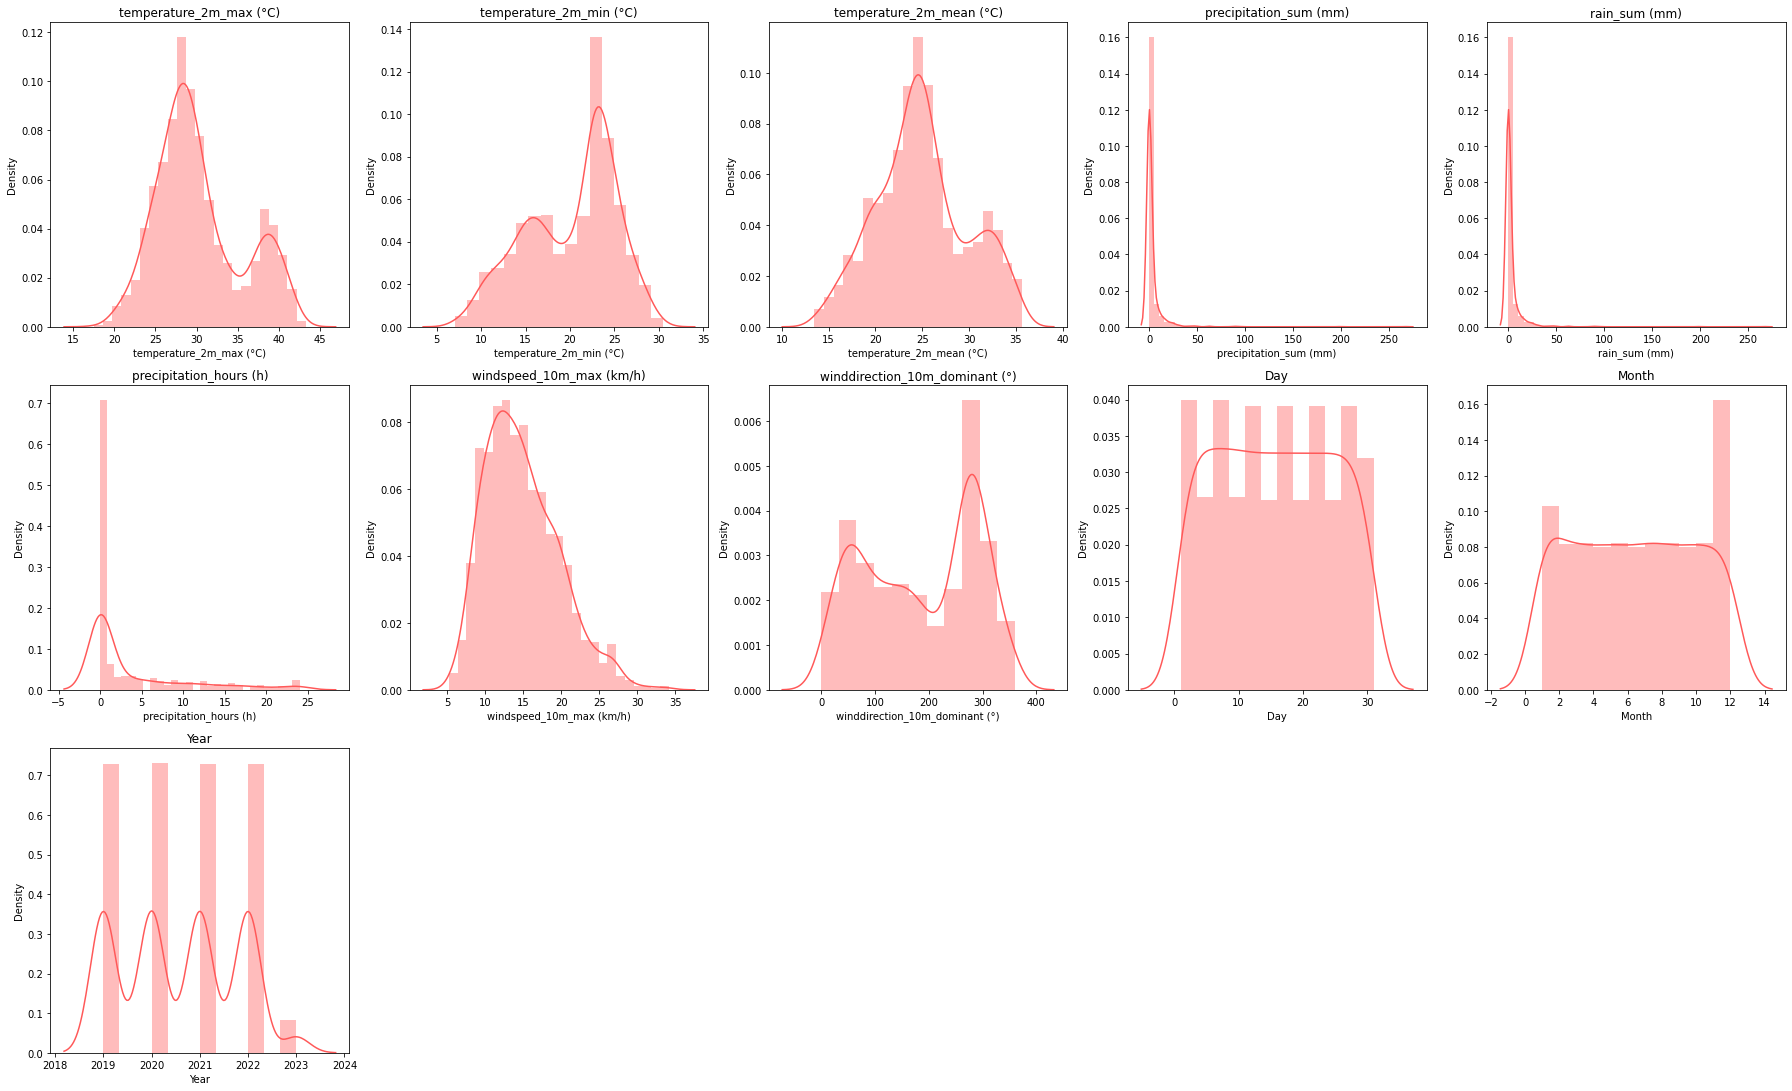

In [22]:
# Distibution plot of Numerical features to check the skewness.

n=1
plt.figure(figsize=(25, 35))
for i in num_data:
  plt.subplot(7,5,n)
  n= n+1
  sns.distplot(df[i],color='#FF5959')
  plt.title(i)
  plt.tight_layout()

# **Bivariate Analysis of Numerical Features**

Bivariate analysis is a statistical analysis technique that involves the analysis of the relationship between two variables. It is a type of analysis that allows you to examine how one variable affects or is related to another variable.



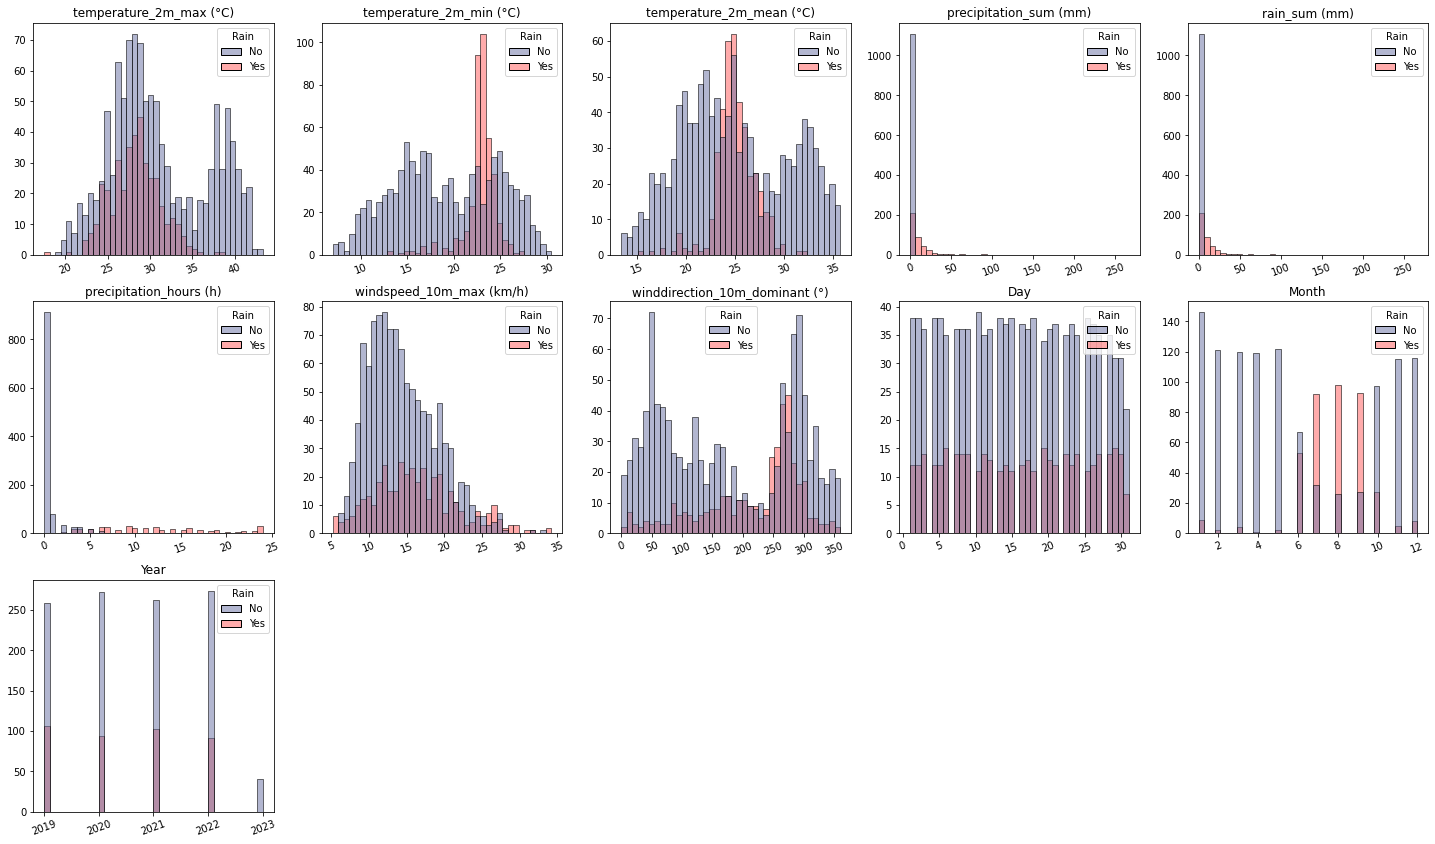

In [23]:
# Lets analyse the continuous values by creating histograms to understand the distribution

df1 = num_data
fig = plt.figure(figsize = (25, 35))
i=1
for n in df1.columns:
    plt.subplot(7, 5, i)
    figure = sns.histplot(x = df[n],hue = df['Rain'], palette = ['#676FA3', '#FF5959'], bins = 40)
    figure.set(xlabel = None, ylabel = None)
    plt.title(str(n), loc = 'center')
    plt.xticks(rotation = 20, fontsize = 10)
    i += 1

# **Outlier Detection**

Outlier detection is a statistical analysis technique that involves identifying and treating observations in a data set that are significantly different from the majority of the other observations. An outlier is an observation that is significantly different from the other observations in the data set, and can be caused by measurement error, data entry errors, or genuine anomalies in the data.

Outliers can have a significant impact on statistical analyses, such as mean and variance, and can result in biased or incorrect results. Therefore, outlier detection is an important step in data analysis to ensure that accurate and reliable results are obtained.

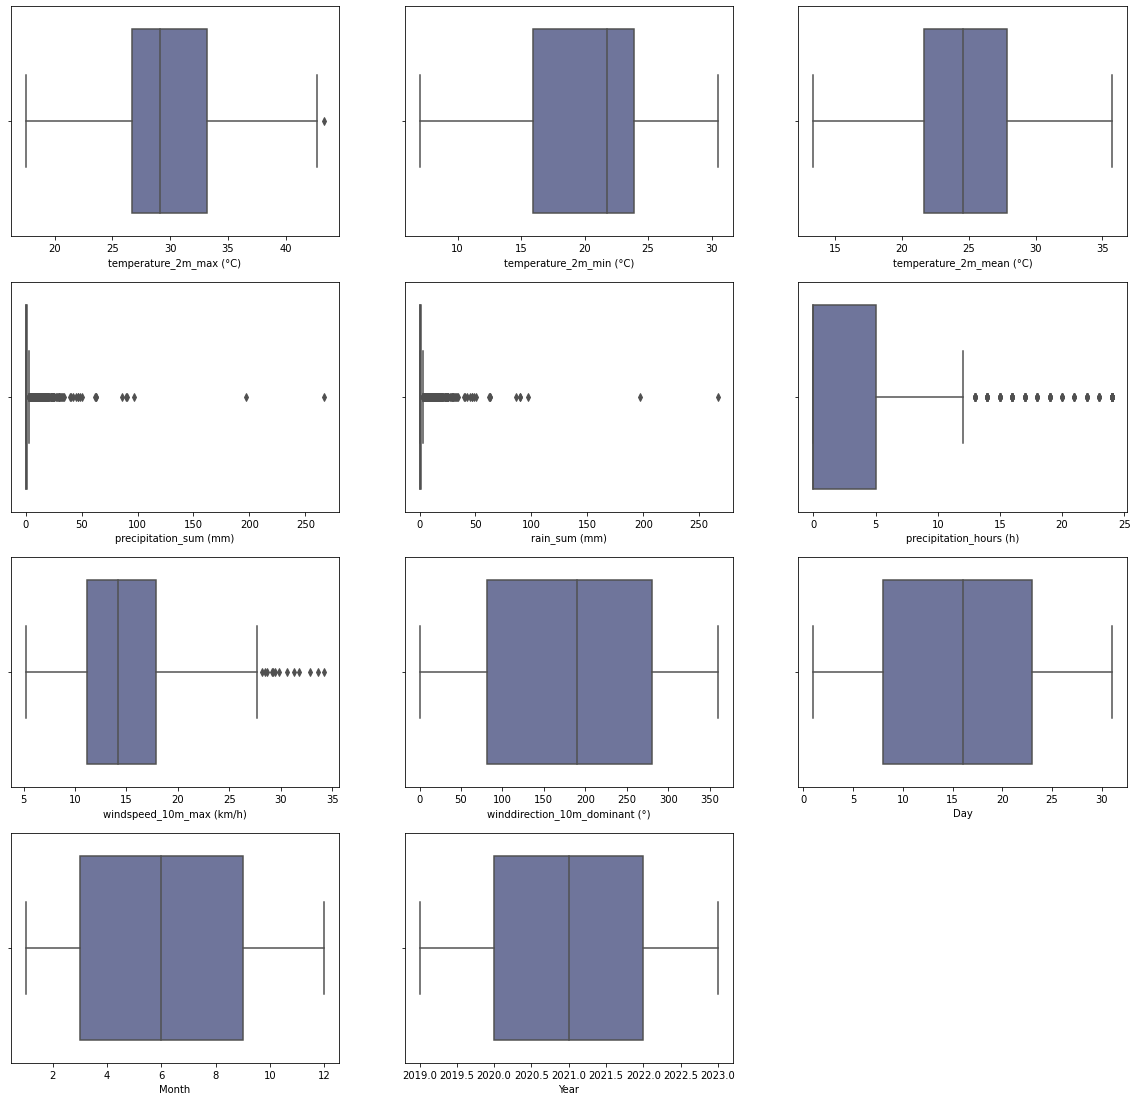

In [24]:
# ploting a boxplot for each numerical feature to check the outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature], color='#676FA3')
    plt.xlabel(numerical_feature)
    plotnumber += 1
plt.show()

**As we can check from the above box plot that we have some fields in our dataset which have outliers but as we know that the tree based models like decision tree, random forest and XGBoost are robust to outliers that is why I am not dealing with outliers as of now and will train the model with the outliers.**

# **Checking Multicollinearity**

Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship.

A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

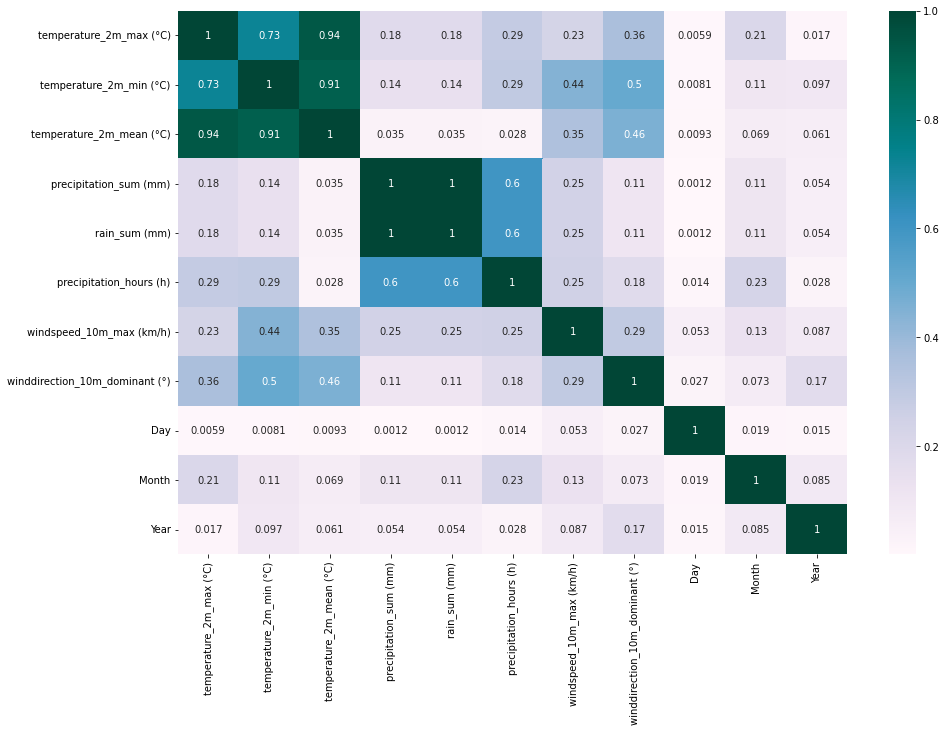

In [25]:
# Ploting correlation graph to check multicollinearity

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

**As we can see from the above heatmap that "precipitation_sum (mm)" and "rain_sum (mm)" are highly correlated because precipitation and rainfall are essentially the same thing. Precipitation is a more general term that refers to any form of moisture that falls from the sky, including rain, snow, sleet, and hail. Rainfall, on the other hand, specifically refers to the amount of water that falls from the sky in the form of rain.**

**So, in essence, rainfall is a type of precipitation, and they are not distinct or separate phenomena. In fact, when meteorologists or climatologists refer to precipitation, they are often specifically referring to rainfall as it is the most common form of precipitation.**

**As a result I have removed the "precipitation_sum (mm)" to remove collinearity.**

# **VIF Calculation**

VIF stands for Variance Inflation Factor, which is a measure of the degree of multicollinearity between independent variables in a regression analysis. Multicollinearity refers to the situation where two or more independent variables in a regression analysis are highly correlated with each other.

VIF measures how much the variance of the estimated regression coefficient of an independent variable is increased due to multicollinearity with the other independent variables. A high VIF indicates that the variable is highly correlated with the other independent variables and may be redundant or unnecessary in the regression analysis.

In general, a VIF value greater than 5 or 10 is considered to indicate a high degree of multicollinearity, although this may vary depending on the specific context and research question.

In [26]:
# Importing necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Making function for VIF calculation.

def cal_VIF(F):
 
  
   VIF = pd.DataFrame()
   VIF["variables"] = F.columns
   VIF["VIF"] = [variance_inflation_factor(F.values, i) for i in range(F.shape[1])]
 
   return(VIF)

In [27]:
# Checking the VIF score of all the independent variables.

cal_VIF(df[[i for i in df.describe().columns]])

,variables,VIF
0,temperature_2m_max (°C),2774.863472
1,temperature_2m_min (°C),1027.319268
2,temperature_2m_mean (°C),6100.230486
3,precipitation_sum (mm),inf
4,rain_sum (mm),inf
5,precipitation_hours (h),4.595723
6,windspeed_10m_max (km/h),14.911067
7,winddirection_10m_dominant (°),5.696088
8,Day,4.188686
9,Month,6.008822


In [28]:
# Checking VIF score of independent variables without precipitation_sum (mm)

cal_VIF(df[[i for i in df.describe().columns if i not in ['precipitation_sum (mm)']]])

,variables,VIF
0,temperature_2m_max (°C),2774.863472
1,temperature_2m_min (°C),1027.319268
2,temperature_2m_mean (°C),6100.230486
3,rain_sum (mm),1.750654
4,precipitation_hours (h),4.595723
5,windspeed_10m_max (km/h),14.911067
6,winddirection_10m_dominant (°),5.696088
7,Day,4.188686
8,Month,6.008822
9,Year,88.093906


**Ad we can check from the above VIF score calculations that still the "temperature_2m_max (°C)", "temperature_2m_min (°C)" and "temperature_2m_mean (°C)" are highly correlated so I checked the VIF score without the "temperature_2m_max (°C)", "temperature_2m_min (°C)".**

In [29]:
# Checking VIF score of independent variables without precipitation_sum (mm)

cal_VIF(df[[i for i in df.describe().columns if i not in ['precipitation_sum (mm)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)']]])

,variables,VIF
0,temperature_2m_mean (°C),38.977304
1,rain_sum (mm),1.707521
2,precipitation_hours (h),2.314684
3,windspeed_10m_max (km/h),13.735906
4,winddirection_10m_dominant (°),5.601658
5,Day,4.185563
6,Month,4.767658
7,Year,38.332205


**Now as we can check that our VIF score got better. Now as I assume that the "Day" and "Year" fields are also not important for the prediction of the model so I also removed these fields.**

In [30]:
# Checking VIF score of independent variables without precipitation_sum (mm)

cal_VIF(df[[i for i in df.describe().columns if i not in ['precipitation_sum (mm)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)','Year', 'Day']]])

,variables,VIF
0,temperature_2m_mean (°C),19.143205
1,rain_sum (mm),1.706592
2,precipitation_hours (h),2.312504
3,windspeed_10m_max (km/h),12.588287
4,winddirection_10m_dominant (°),5.500426
5,Month,4.077013


**Finally we can see that the VIF score further improved. So dropping these fields from the dataset**

In [31]:
# Dropping the columns with multi-collinearity.

df = df.drop(['precipitation_sum (mm)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)','Year', 'Day'],axis=1)

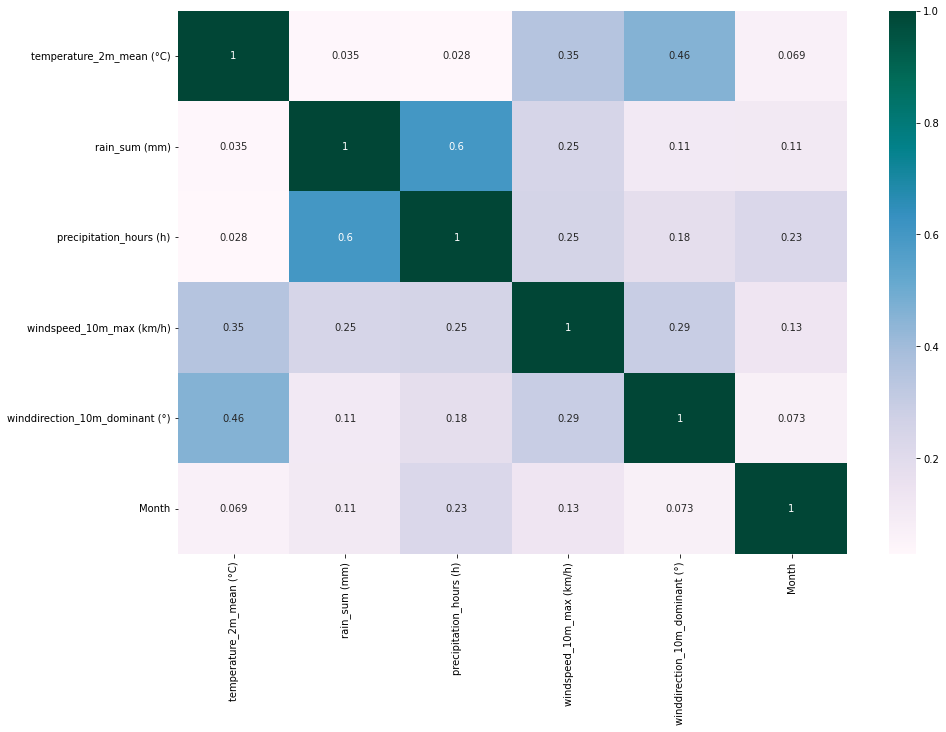

In [32]:
# Checking multicollinearity after removing the correlated fields from our dataframe.

plt.figure(figsize=(15,10))
sns.heatmap(abs(df.corr()), cmap= 'PuBuGn', annot=True)

**As we can see from the above heatmap that now no more fields are correlated so now our dataset is free of multicollinearity and finally we can procede further.**

# **Feature Engineering**

In [33]:
# Converting the boolean fearures in binary

df['Rain'] = df['Rain'].apply(lambda x: 1 if x == "Yes" else 0)

In [34]:
# Checking the head of our dataset.
df.head()

,temperature_2m_mean (°C),rain_sum (mm),precipitation_hours (h),windspeed_10m_max (km/h),winddirection_10m_dominant (°),Month,Rain
0,18.2,0.0,0,10.1,131,1,0
1,20.1,0.0,0,10.2,325,1,0
2,18.7,0.0,0,10.5,40,1,0
3,18.7,0.0,0,10.2,109,1,0
4,19.6,0.0,0,12.5,189,1,0


# **Checking the Balance of the dataset**

Important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, '1' and '0', a class distribution of 50:50 is considered ideal

Let’s see how our target variable i.e. "Rain" distribution looks like.

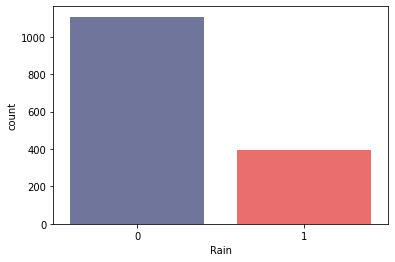

In [35]:
# Plotting the count plot to check the distribution of our target variable.

sns.countplot(data = df, x = df['Rain'], palette = ['#676FA3', '#FF5959'])

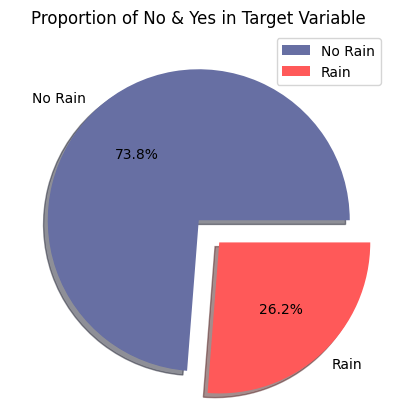

In [36]:
# Ploting the pie chart to check the balance in the Target Variable.

plt.figure(figsize=(7,5), dpi=100)
proportion = df['Rain'].value_counts()
labels = ['No Rain','Rain']
plt.title('Proportion of No & Yes in Target Variable')
plt.pie(proportion, explode=(0,0.2),labels=labels, shadow = True, autopct = '%1.1f%%', colors= ['#676FA3', '#FF5959'])
plt.legend()
plt.show()

**As we can see that our data is highly imbalanced. Majority of the data points belong to "No Rain" class.**

# **Train Test Split**

In [37]:
# Splitting the data into set of independent variables and a dependent variable.

X = df.drop('Rain',axis=1).values
y = df['Rain'].values

In [38]:
# Splitting the data into train and test sets.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify = y)

In [39]:
# Training data alomg with possible number of results for each class.
pd.DataFrame(y_train).value_counts()

0    886
1    315
dtype: int64

In [40]:
# Testing data alomg with possible number of results for each class.
pd.DataFrame(y_test).value_counts()

0    222
1     79
dtype: int64

# **Handling the Imbalance in the dataset using SMOTE**

**SMOTE** creates synthetic samples for the minority class by creating new samples that are combinations of the existing minority samples. The basic idea behind SMOTE is to create synthetic samples of the minority class by selecting two or more similar minority samples, and then creating a new sample that combines features from the selected samples. The synthetic samples are created by interpolating between pairs of instances in the minority class, effectively creating new examples in the feature space. 

By creating new synthetic samples, the minority class becomes more balanced with respect to the majority class, which can improve the performance of classifiers in situations where class imbalance is an issue.

In [41]:
# Importing SMOTETomek for handling class imbalancies.

from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE

In [42]:
# Handling class imbalancies using SMOTE. 

X_smote, y_smote = SMOTETomek(random_state=42).fit_resample(X_train, y_train)

In [43]:
# Dataframe to contain Model performance analysis reports.
res_df=pd.DataFrame()

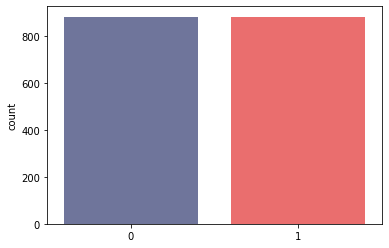

In [44]:
# Ploting the count plot to check the balance after handling imbalance.
sns.countplot(y_smote, palette = ['#676FA3', '#FF5959'])

**Now from the above count plot we can see that our data imbalance issue is also fixed.**

# **Performance Metrics**

*Different performance metrics are used to evaluate machine learning model. Based on our task we can choose our performance metrics. Since our task is of classification and that too binary class classification, whether client will or will not subscribe for deposits.*

*Here we will be using AUC ROC*

**ROC** *also known as Receiver Operating Characteristics, shows the performance of binary class classifiers across the range of all possible thresholds plotting between true positive rate and 1-false positive rate.*

**AUC** *measures the likelihood of two given random points, one from positive and one from negative, the classifier will rank the positive points above negative points. AUC-ROC is popular classification metric that presents the advantage of being independent of false positive or negative points.*

**Secondary Performance Metrics**

**Macro-F1 Score**: *F1 score is the harmonic mean between Precision and Recall. Macro F1 score is used to know how our model works in overall dataset.*

**Confusion Matrix**: *This matrix gives the count of true negative, true positive, false positive and false negative data points.*

# **Models**

Following models have been used for predictions:-

*   Logistic Regression Classifier
*   Support Vector Machine
*   Random Forest Classifier



# **Logistic Regression Classifier**

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Logistic Regression is used when the dependent variable(target) is categorical. The model delivers a binary or dichotomous outcome limited to two possible outcomes: yes/no, 0/1, or true/false.

Logical regression analyzes the relationship between one or more independent variables and classifies data into discrete classes. It is extensively used in predictive modeling, where the model estimates the mathematical probability of whether an instance belongs to a specific category or not.

For example, 0 – represents a negative class; 1 – represents a positive class. Logistic regression is commonly used in binary classification problems where the outcome variable reveals either of the two categories (0 and 1).

Typical properties of the logistic regression equation include:

*   Logistic regression’s dependent variable obeys ‘Bernoulli distribution’

*   Estimation/prediction is based on ‘maximum likelihood.’ 

*   Logistic regression does not evaluate the coefficient of determination (or R squared) as observed in linear regression’. Instead, the model’s fitness is assessed through a concordance.

In [45]:
# Importing important library for building Logistic Regression Classifier.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report 

In [46]:
# Creating model object for logistic regression.
clf = LogisticRegression(fit_intercept=True, max_iter=10000)

# fit the model.
clf.fit(X_smote, y_smote)

LogisticRegression(max_iter=10000)

In [47]:
# Get the predicted probabilities

train_preds = clf.predict_proba(X_smote)
test_preds = clf.predict_proba(X_test)

In [48]:
# Getting the predicted classes for training and testing set.
train_class_preds = clf.predict(X_smote)
test_class_preds = clf.predict(X_test)

In [49]:
# Getting the accuracy scores for training and testing set.
train_accuracy = accuracy_score(train_class_preds, y_smote)
test_accuracy = accuracy_score(test_class_preds, y_test)

# Display accuracies.
print("The accuracy on train data is ", train_accuracy)
print("The accuracy on test data is ", test_accuracy)

The accuracy on train data is  0.9965986394557823
The accuracy on test data is  0.9933554817275747


In [50]:
# Confusion Matrix for logistic regression classifier.
cf_matrix = confusion_matrix(y_test,test_class_preds)
cf_matrix

array([[220,   2],
       [  0,  79]])

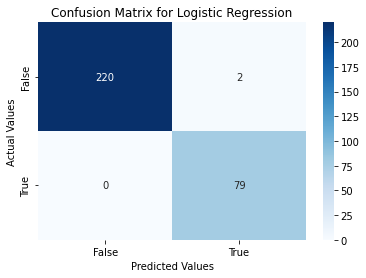

In [51]:
# Ploting the confusion matrix.

labels = ['220','2','0','79']

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Confusion Matrix for Logistic Regression');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [52]:
# Predicted values.
y_pred_log_reg = clf.predict(X_test)

In [53]:
# Getting classification report.
dict1 = classification_report(y_test, y_pred_log_reg, output_dict = True)

# Adding results to the evaluation dataframe.
tempodf = pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Logistic Regression Classifier'

res_df = res_df.append(tempodf[2:-2])

In [54]:
# Display model evaluation dataframe.
res_df

,precision,recall,f1-score,support,Model
accuracy,0.993355,0.993355,0.993355,0.993355,Logistic Regression Classifier


# **Support Vector Machine**

SVM is a powerful supervised algorithm that works best on smaller datasets but on complex ones. Support Vector Machine, abbreviated as SVM can be used for both regression and classification tasks, but generally, they work best in classification problems.

Support Vectors: These are the points that are closest to the hyperplane. A separating line will be defined with the help of these data points.

Margin: it is the distance between the hyperplane and the observations closest to the hyperplane (support vectors). In SVM large margin is considered a good margin. There are two types of margins hard margin and soft margin.

In [55]:
# Importing Support vector machine Classifier.

from sklearn import svm

In [56]:
#Create a svm Classifier
svmc = svm.SVC(kernel='poly') # Polynomial Kernel

# Fitting the model with training set
svmc.fit(X_smote, y_smote)

# Predicting values for test set
y_pred_svm = svmc.predict(X_test)

# Checking Model Accuracy
svmc.score(X_test, y_test)

0.9102990033222591

In [57]:
# Getting Classification report for SVM model
dict1 = classification_report(y_test, y_pred_svm, output_dict=True)

# Adding results to the evaluation dataframe
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Support Vector Machine'
res_df=res_df.append(tempodf[2:-2])

In [58]:
# Model evaluation dataframe
res_df
     

,precision,recall,f1-score,support,Model
accuracy,0.993355,0.993355,0.993355,0.993355,Logistic Regression Classifier
accuracy,0.910299,0.910299,0.910299,0.910299,Support Vector Machine


# **Random Forest Classifier**

Random Forest is a technique that uses ensemble learning, that combines many weak classifiers to provide solutions to complex problems.

As the name suggests random forest consists of many decision trees. Rather than depending on one tree it takes the prediction from each tree and based on the majority votes of predictions, predicts the final output.

Random forests use the bagging method. It creates a subset of the original dataset, and the final output is based on majority ranking and hence the problem of overfitting is taken care of.

In [59]:
# Importing Necessary library

from sklearn.ensemble import RandomForestClassifier

In [60]:
# variable to hold Maximum accuracy value
max_accuracy = 0

# Iterating upto 50 times with random states from 0 to 49
for x in range(50):
  # Creating model object for random forest classifier 
  rf = RandomForestClassifier(random_state=x)

  # Fitting the model
  rf.fit(X_smote,y_smote)

  # Predict for testing set
  Y_pred_rf = rf.predict(X_test)

  # Accuracy at a particular random state
  current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)

  # Compare to get the best accuracy and the respective random state
  if(current_accuracy>max_accuracy):
    max_accuracy = current_accuracy
    best_x = x

# Implementing Random Forest classifier model using the best random state we found
rf = RandomForestClassifier(random_state=best_x)

# Fitting the model
rf.fit(X_smote,y_smote)

# Predicting on test set
Y_pred_rf = rf.predict(X_test)

In [61]:
# Accuracy score for the random forest model on test set

score_rf = round(accuracy_score(Y_pred_rf, y_test)*100, 2)
print("The accuracy score for the test set achieved using Random forest is: " + str(score_rf) + " %")

The accuracy score for the test set achieved using Random forest is: 100.0 %


In [62]:
# Predicting values for train set

y_pred_train_rf = rf.predict(X_smote)

In [63]:
# Accuracy score for the random forest model on train set

score_rf = round(accuracy_score(y_pred_train_rf, y_smote)*100, 2)
print("The accuracy score for the train set achieved using Random forest is: " + str(score_rf) + " %")

The accuracy score for the train set achieved using Random forest is: 100.0 %


In [64]:
# Getting Classification report for random forest model
dict1 = classification_report(y_test, Y_pred_rf, output_dict=True)

# Adding results to the model evaluation dataframe 
tempodf=pd.DataFrame(dict1).transpose()
tempodf['Model'] = 'Random Forest Classifier'
res_df=res_df.append(tempodf[2:-2])

In [65]:
# Model evaluation dataframe 
res_df

,precision,recall,f1-score,support,Model
accuracy,0.993355,0.993355,0.993355,0.993355,Logistic Regression Classifier
accuracy,0.910299,0.910299,0.910299,0.910299,Support Vector Machine
accuracy,1.000000,1.000000,1.000000,1.000000,Random Forest Classifier


# **Comparing Models**

In [66]:
# Necessary library
from prettytable import PrettyTable

In [67]:
# Plotting the table

print('**** Comparison of  models ****')
table = PrettyTable(['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1_score'])
table.add_row(['Logistic regression', 0.99, 0.99, 0.99, 0.99])
table.add_row(['Support Vector Machine', 0.91, 0.91, 0.91, 0.91])
table.add_row(['Random Forest', 1.00, 1.00, 1.00, 1.00])

print(table)

**** Comparison of  models ****
+------------------------+---------------+-----------+--------+----------+
|         Model          | Test Accuracy | Precision | Recall | F1_score |
+------------------------+---------------+-----------+--------+----------+
|  Logistic regression   |      0.99     |    0.99   |  0.99  |   0.99   |
| Support Vector Machine |      0.91     |    0.91   |  0.91  |   0.91   |
|     Random Forest      |      1.0      |    1.0    |  1.0   |   1.0    |
+------------------------+---------------+-----------+--------+----------+


# **Conclusions**

* **As we can check from the above table that random forest is giving us the highest F1_score.**

* **In conclusion, the rainfall prediction can be accuratley done using Random Forest.**